In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

<Axes: >

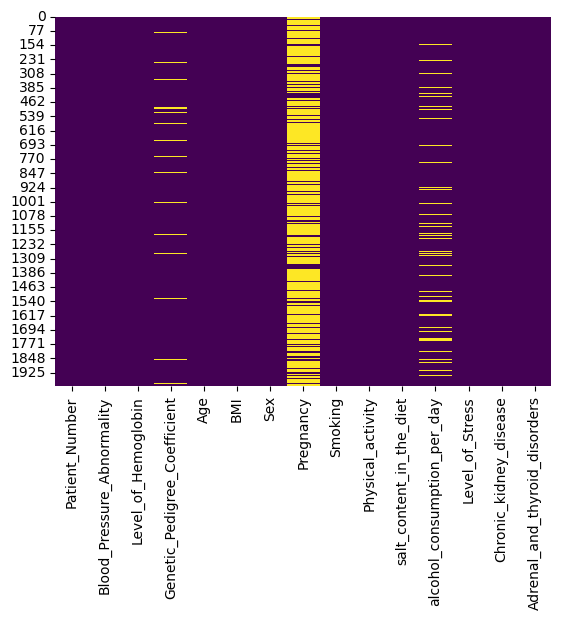

In [29]:
df = pd.read_csv("BP_data.csv")
df.info()
df.describe()
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [30]:
# 필요 없는 컬럼 제거
df.drop(columns=["Pregnancy"], inplace=True)

# 결측치 평균 대체
for col in ["Genetic_Pedigree_Coefficient", "alcohol_consumption_per_day"]:
    df[col].fillna(df[col].mean(), inplace=True)

In [31]:
print(df.isnull().sum())

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64


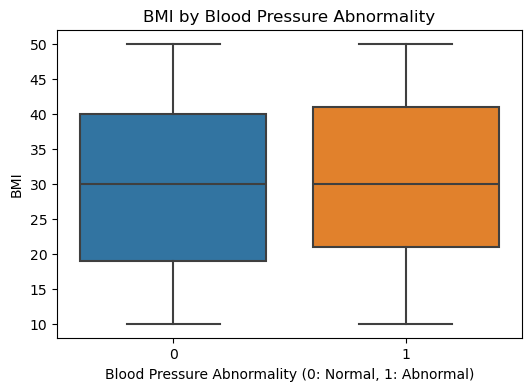

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Blood_Pressure_Abnormality', y='BMI')
plt.title('BMI by Blood Pressure Abnormality')
plt.xlabel('Blood Pressure Abnormality (0: Normal, 1: Abnormal)')
plt.ylabel('BMI')
plt.show()

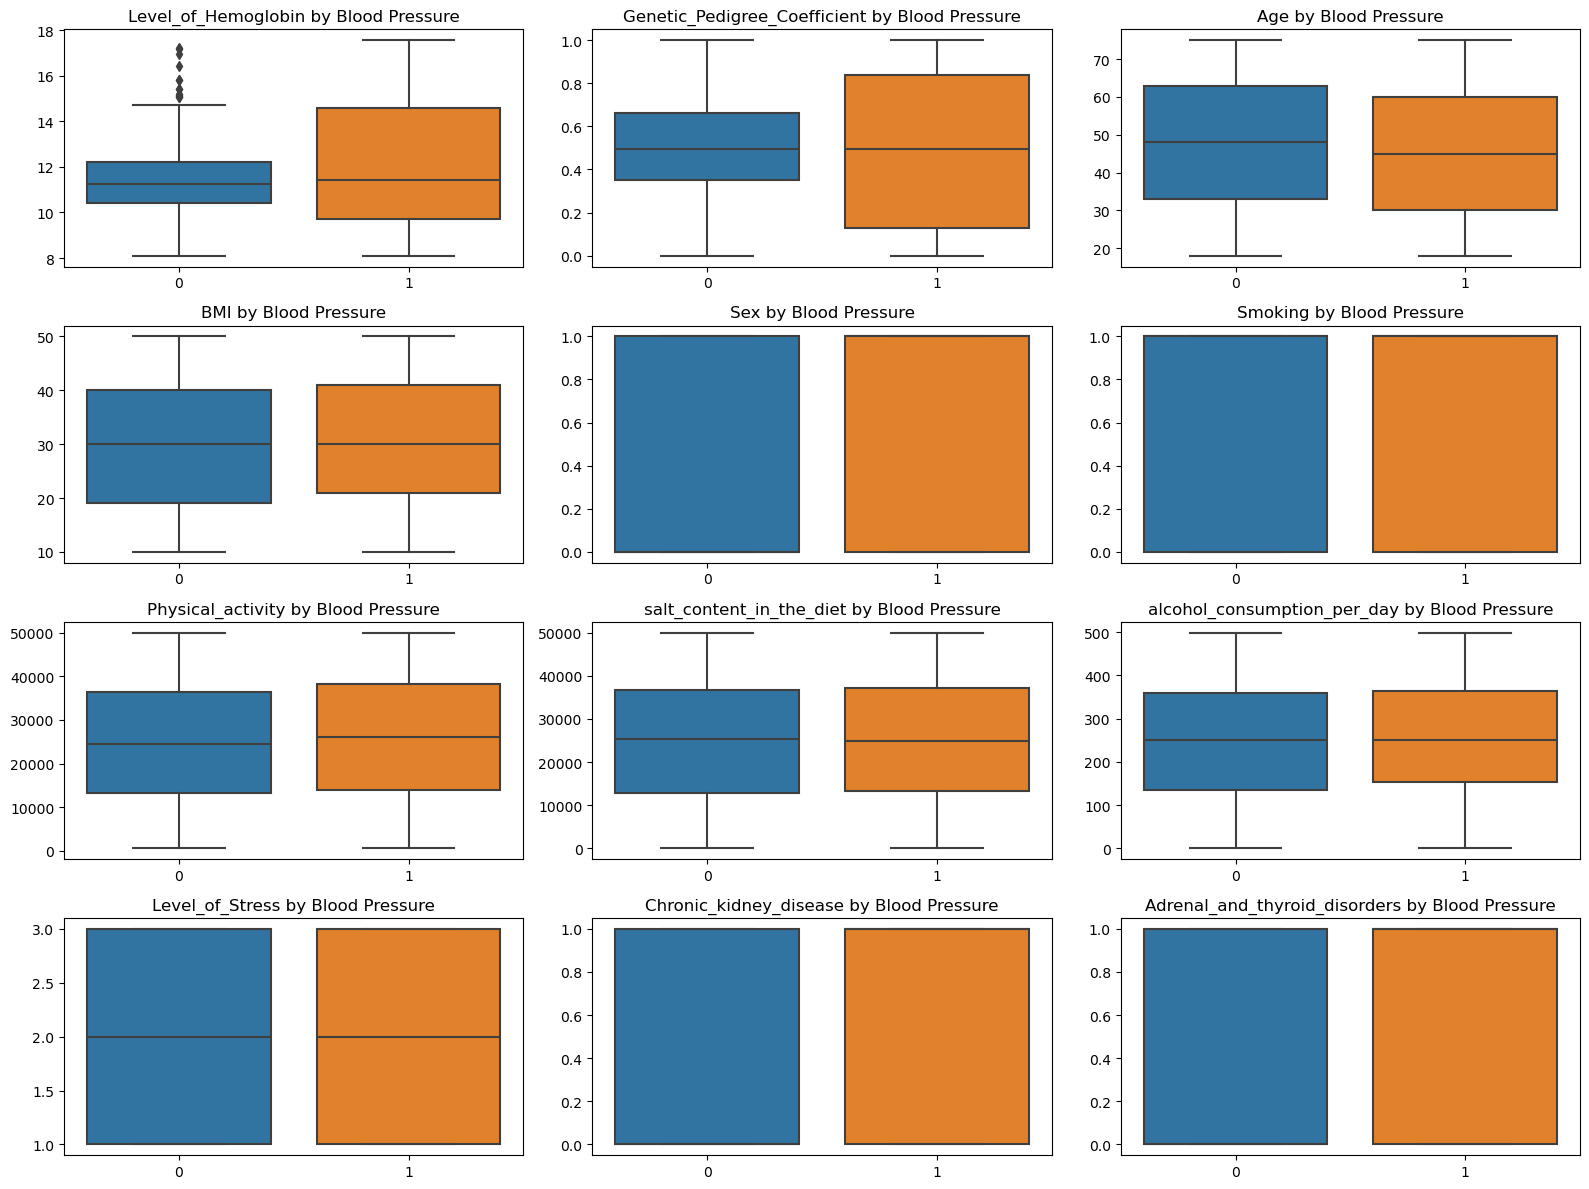

In [35]:
numeric_cols = df.select_dtypes(include='number').drop(columns=['Patient_Number', 'Blood_Pressure_Abnormality'])

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x='Blood_Pressure_Abnormality', y=col)
    plt.title(f'{col} by Blood Pressure')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

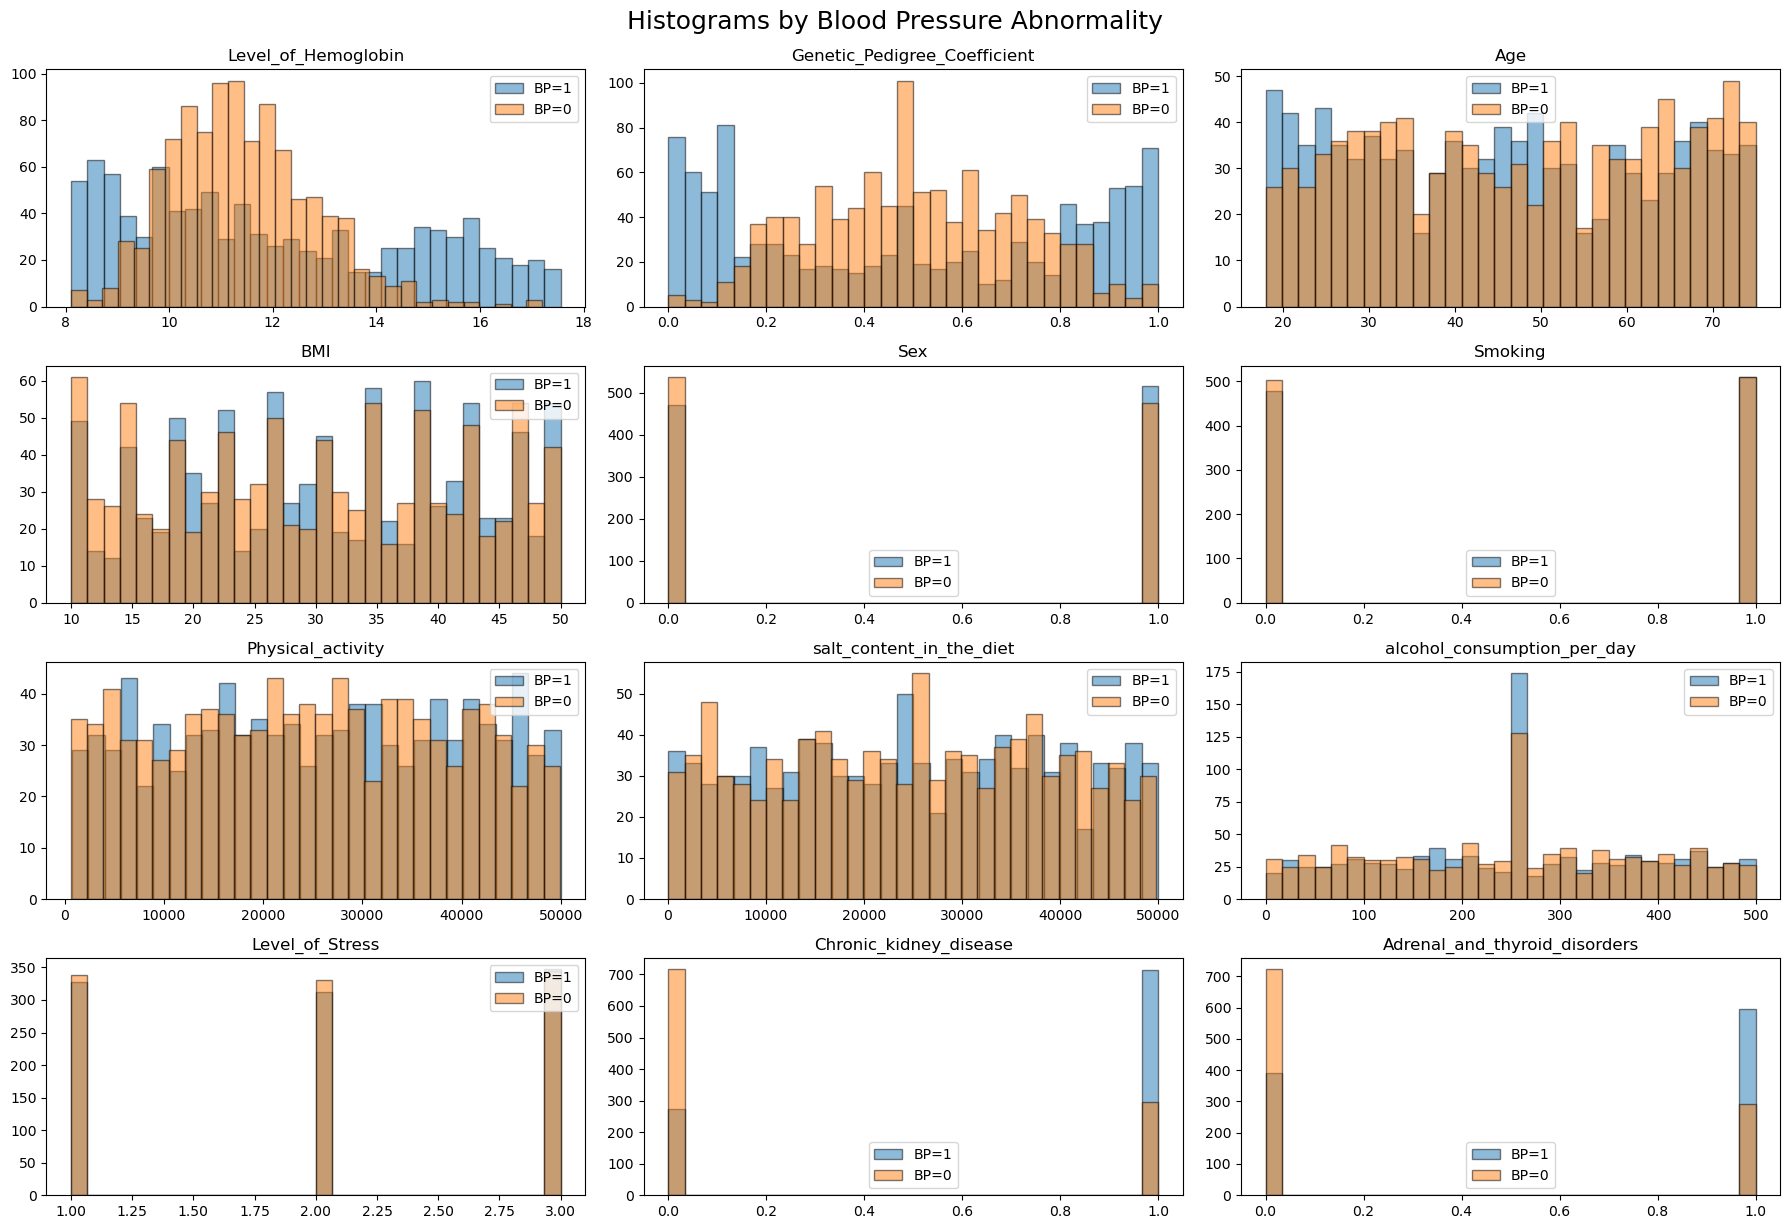

In [39]:
import matplotlib.pyplot as plt

# 수치형 변수 중 타깃과 ID 제외
numeric_cols = df.select_dtypes(include='number').drop(columns=['Patient_Number', 'Blood_Pressure_Abnormality'])

# 히스토그램 그리기
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(4, 3, i)
    for label in df['Blood_Pressure_Abnormality'].unique():
        subset = df[df['Blood_Pressure_Abnormality'] == label]
        plt.hist(subset[col], bins=30, alpha=0.5, label=f'BP={label}', edgecolor='black')
    plt.title(f'{col}')
    plt.legend()
    plt.tight_layout()

plt.suptitle('Histograms by Blood Pressure Abnormality', fontsize=18, y=1.02)
plt.show()